# Exploración y Análisis de Datos (EDA)

[![Banner.png](https://i.postimg.cc/C1t2SCwf/Banner.png)](https://postimg.cc/FdypxLd9)

## Introducción

Este notebook se centra en el análisis exploratorio de datos (EDA) para comprender mejor las características de las transacciones financieras y detectar patrones relacionados con el fraude. Las tareas principales incluyen:

**Exploración descriptiva:** Examinar las características de los datos, como la distribución de variables, relaciones entre variables y valores atípicos.

**Visualización de datos:** Crear gráficos y tablas para visualizar la distribución de los datos, identificar patrones y tendencias, y destacar posibles indicadores de fraude.

**Análisis de correlación:** Evaluaremos la relación entre variables para comprender cómo se asocian los diferentes factores con el fraude.

**Identificación de características relevantes:** Seleccionar las variables más importantes para el análisis posterior, como el monto de la transacción, el método de pago y la ubicación del cliente.
Objetivos:

Obtener una comprensión profunda de las características de las transacciones financieras.
Identificar patrones y tendencias que puedan indicar actividades fraudulentas.
Seleccionar las variables más relevantes para la construcción de modelos de predicción de fraude.


In [1]:
# Importo librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargo el DataFrame guardado
file_path = r"C:\Users\Esteban García\OneDrive\Escritorio\LABs\Carpeta Fraude\DF guardado\ecommerce.csv"
df = pd.read_csv(file_path)

In [5]:
df

,Transaction ID,Customer ID,Transaction Amount,Transaction Day,Transaction Hour,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days
0,15d2e414-8735-46fc-9e02-80b472b2580f,d1b87f62-51b2-493b-ad6a-77e0fe13e785,58.09,20-02-2024,05:58:41,Bank Transfer,Electronics,1,17,Amandaborough,Tablet,212.195.49.198,Unit 8934 Box 0058\nDpo Aa 05437,Unit 8934 Box 0058\nDpo Aa 05437,0,30
1,0bfee1a0-6d5e-40da-a446-d04e73b1b177,37de64d5-e901-4a56-9ea0-af0c24c069cf,389.96,25-02-2024,08:09:45,Debit Card,Electronics,2,40,East Timothy,Desktop,208.106.249.121,"634 May Keys\nPort Cherylview, Nv 75063","634 May Keys\nPort Cherylview, Nv 75063",0,72
2,e588eef4-b754-468e-9d90-d0e0abfc1af0,1bac88d6-4b22-409a-a06b-425119c57225,134.19,18-03-2024,03:42:55,Paypal,Home & Garden,2,22,Davismouth,Tablet,76.63.88.212,"16282 Dana Falls Suite 790\nRothhaven, Il 15564","16282 Dana Falls Suite 790\nRothhaven, Il 15564",0,63
3,4de46e52-60c3-49d9-be39-636681009789,2357c76e-9253-4ceb-b44e-ef4b71cb7d4d,226.17,16-03-2024,20:41:31,Bank Transfer,Clothing,5,31,Lynnberg,Desktop,207.208.171.73,"828 Strong Loaf Apt. 646\nNew Joshua, Ut 84798","828 Strong Loaf Apt. 646\nNew Joshua, Ut 84798",0,124
4,074a76de-fe2d-443e-a00c-f044cdb68e21,45071bc5-9588-43ea-8093-023caec8ea1c,121.53,15-01-2024,05:08:17,Bank Transfer,Clothing,2,51,South Nicole,Tablet,190.172.14.169,"29799 Jason Hills Apt. 439\nWest Richardtown, ...","29799 Jason Hills Apt. 439\nWest Richardtown, ...",0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472689,c8604004-2f4c-42ce-a1c4-cd2bebca79bb,f8a534ad-0458-465e-a85b-3ad2cdf391bc,208.48,12-01-2024,23:39:55,Paypal,Health & Beauty,2,29,North Laurafort,Desktop,27.245.104.92,Usnv Griffin\nFpo Aa 52700,Usnv Griffin\nFpo Aa 52700,0,149
1472690,fff0df19-fd4a-42a5-bc42-64bb7b02edb0,f2ef2239-d9b9-40d0-9993-4b8f305d5a7b,231.57,27-03-2024,04:31:45,Credit Card,Clothing,2,32,Burnsville,Tablet,203.54.50.163,"478 John Square Apt. 235\nMillerhaven, Ga 68797","478 John Square Apt. 235\nMillerhaven, Ga 68797",0,132
1472691,9e79012f-e00b-47d1-8700-0c302db20d3e,fa5b9a25-9606-478a-8abe-ef20bbb3980f,101.80,31-01-2024,23:51:42,Bank Transfer,Electronics,4,36,Garciafort,Mobile,51.241.30.149,"351 Frazier Radial Apt. 989\nPort Charles, Oh ...","182 House Island Suite 198\nEast Scott, Fm 84301",0,98
1472692,917066b1-4dfb-4472-b3f0-292663c45d21,04524272-e14f-460b-bc70-5316bd28463d,61.80,12-01-2024,16:21:32,Bank Transfer,Electronics,5,34,Lake Josephberg,Desktop,210.67.203.4,"27307 Gonzalez Shore Suite 661\nPort Lynn, Wv ...","27307 Gonzalez Shore Suite 661\nPort Lynn, Wv ...",0,191


In [3]:
# Resumen estadístico
print(df.describe())

       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        1.472694e+06  1.472694e+06  1.472694e+06   1.472694e+06   
mean         2.267695e+02  3.000225e+00  3.451868e+01   5.012990e-02   
std          2.704015e+02  1.414733e+00  9.991539e+00   2.182130e-01   
min          1.000000e+01  1.000000e+00  0.000000e+00   0.000000e+00   
25%          6.861000e+01  2.000000e+00  2.800000e+01   0.000000e+00   
50%          1.517600e+02  3.000000e+00  3.500000e+01   0.000000e+00   
75%          2.960500e+02  4.000000e+00  4.100000e+01   0.000000e+00   
max          1.270175e+04  5.000000e+00  8.600000e+01   1.000000e+00   

       Account Age Days  
count      1.472694e+06  
mean       1.796454e+02  
std        1.068642e+02  
min        1.000000e+00  
25%        8.600000e+01  
50%        1.790000e+02  
75%        2.720000e+02  
max        3.650000e+02  


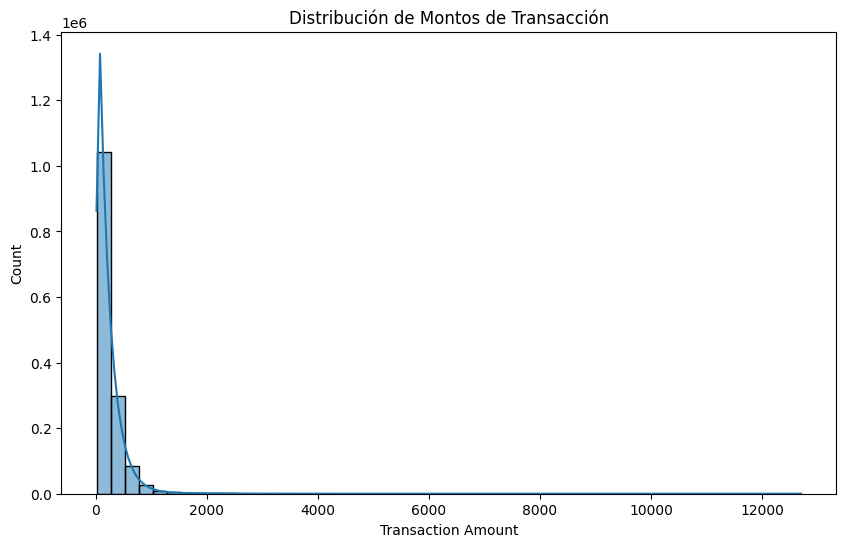

In [6]:
# Distribución de datos
plt.figure(figsize=(10, 6))
sns.histplot(df['Transaction Amount'], bins=50, kde=True)
plt.title('Distribución de Montos de Transacción')
plt.show()

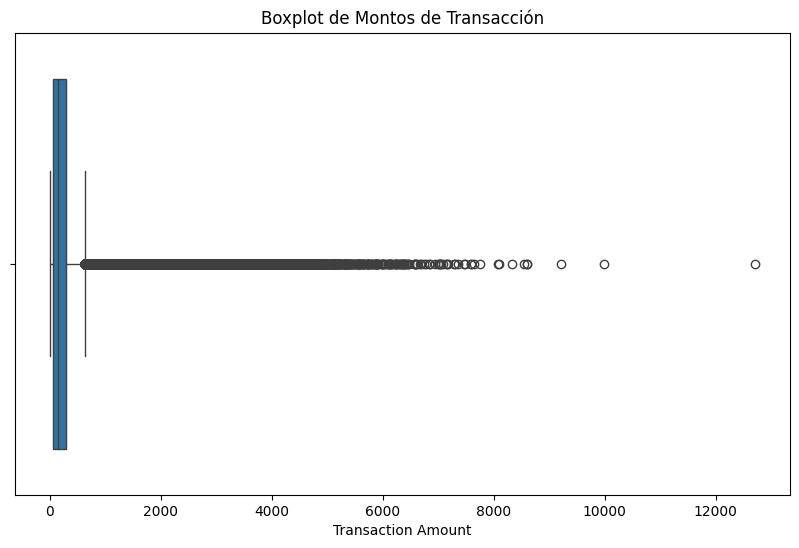

In [7]:
# Detección de valores atípicos
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Transaction Amount'])
plt.title('Boxplot de Montos de Transacción')
plt.show()

In [8]:
# Correlación entre variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

ValueError: could not convert string to float: '15d2e414-8735-46fc-9e02-80b472b2580f'

<Figure size 1200x800 with 0 Axes>

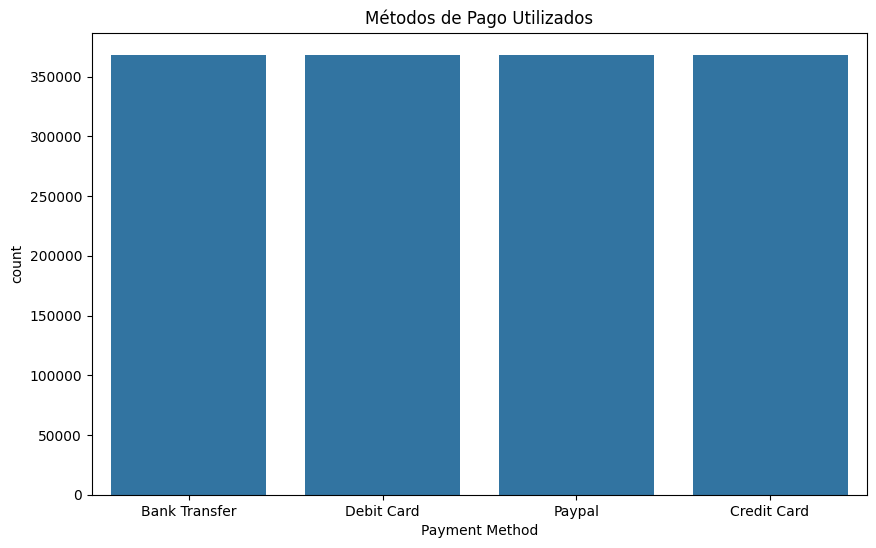

In [9]:
# Análisis de categorías
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment Method', data=df)
plt.title('Métodos de Pago Utilizados')
plt.show()

In [10]:
# Análisis geográfico (ejemplo)
# Aquí puedes usar una librería como folium para crear mapas interactivos
# Ejemplo con un scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Is Fraudulent', data=df)
plt.title('Distribución Geográfica de Transacciones')
plt.show()

ValueError: Could not interpret value `Longitude` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

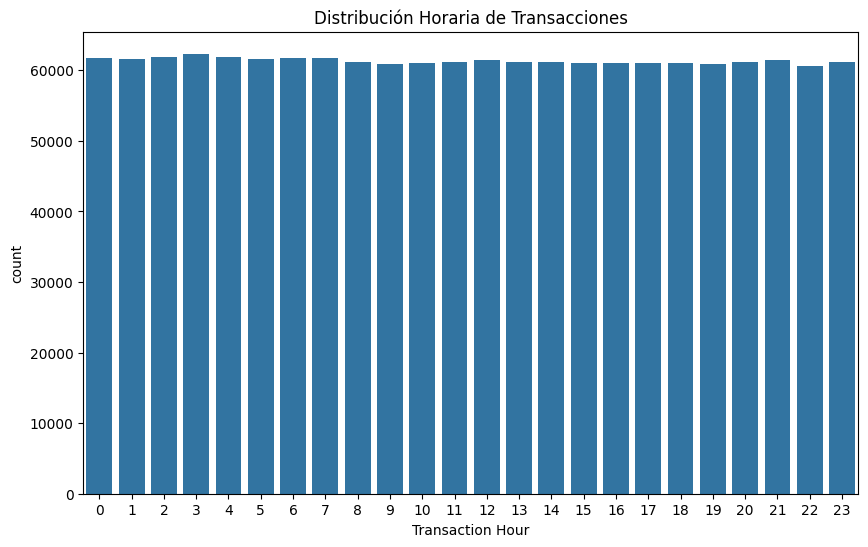

In [11]:
# Temporalidad de las transacciones
df['Transaction Hour'] = pd.to_datetime(df['Transaction Hour'], format='%H:%M:%S').dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='Transaction Hour', data=df)
plt.title('Distribución Horaria de Transacciones')
plt.show()

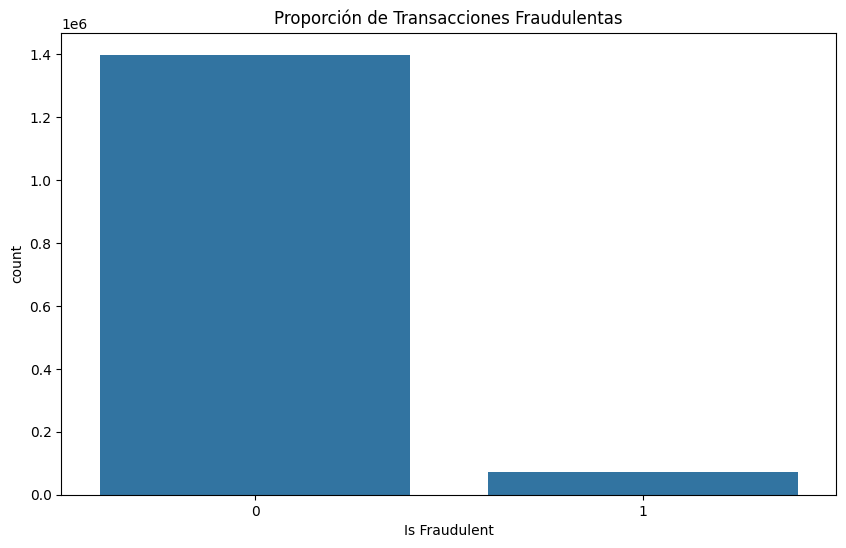

In [12]:
# Visualización de fraudes
plt.figure(figsize=(10, 6))
sns.countplot(x='Is Fraudulent', data=df)
plt.title('Proporción de Transacciones Fraudulentas')
plt.show()

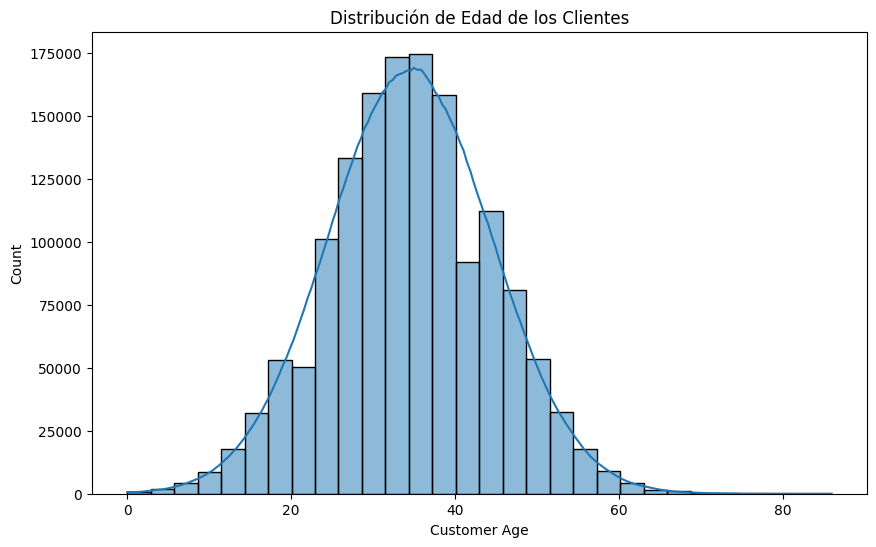

In [13]:
# Segmentación de clientes (ejemplo simple)
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=30, kde=True)
plt.title('Distribución de Edad de los Clientes')
plt.show()